<h1>Handwritten digits classification (MNIST dataset)</h1>
<h2> Neural Network (NN), Support Vector Machines (SVM), Random Forest (RM)</h2>

<b>Loading libraries</b>

In [54]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.externals import joblib

<b>Loading MNIST dataset and print its size (60000 trainig + 10000 testing data)</b>

In [55]:
mnist = fetch_mldata('MNIST original')
print ('MNIST dataset size: %s' % len(mnist.data))

MNIST dataset size: 70000


<b>Print some sample images from dataset</b>

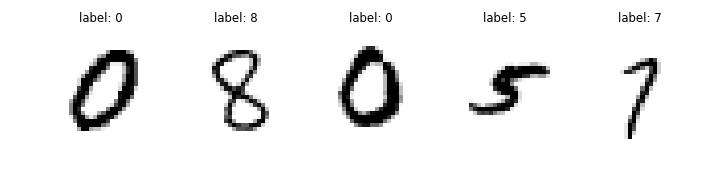

In [56]:
images = mnist.data
labels = mnist.target
random_idx = np.random.choice(images.shape[0], 5)
images_and_labels = list(zip(images[random_idx], labels[random_idx]))

img = plt.figure(1, figsize=(7, 7), dpi=120)
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(1, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %s' % int(label), fontsize = 7)
plt.show()

<b>Getting data and corresponding labels from MNIST</b>

In [57]:
X = mnist.data/255.0
y = mnist.target

<b>Split data and labels into training and testing sets by using the 'train_test_split' function and passing the test_size parameter (80% - training, 20% - testing)</b>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Copy X_train to use for visualisation (not scaled)
X_test_v = X_test

print ('Training data size: %s - Trainig labels size: %s' % (len(X_train), len(y_train)))
print ('Testing data size: %s - Testing labels: %s' %  (len(X_test), len(y_test)))

Training data size: 56000 - Trainig labels size: 56000
Testing data size: 14000 - Testing labels: 14000


In order to standardise feature vectors I used a StandardScaler(), that scales the data to have a mean of 0 and variance of 1. That helped to avoid domination of feature vectors in greater ranges those in smaller ranges, and make a computation faster and more accurate. 

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The cruicial task was to decide on how many hidden layers and a number of neurons in them need to be used for the NN. A research on NN implementation showed, that there are no specific formulas and it really depends on different factors like the dataset used, training algorithm, and etc.. However, there are chances of underfitting or overfitting of the NN, that may lead to bad results in classification. <br>
To find the best number of hidden neurons, a GridSearchCV was used.

<b>Define classifiers</b>

In [60]:
######
# NN #
######
'''
parameters = {'hidden_layer_sizes': [(16,), (64,), (128,), (256,), (512,), (1024,)]}
nn_clf = GridSearchCV(MLPClassifier(activation='logistic', random_state=1), param_grid = parameters, n_jobs=-1)
print("The best parameters are %s with a score of %0.2f" % (nn_clf.best_params_, nn_clf.best_score_))
'''
nn_clf = MLPClassifier(activation='logistic', hidden_layer_sizes = (100,))
print('NN classifier: \n %s' % nn_clf)


#######
# SVM #
#######
'''
%%time
That block of code is commeted as the code was run only once to find 
the best parameters of C and γ for the SVM() classifier. 

The result:
The best parameters are {'C': 10, 'gamma': 0.001} with a score of 0.97
The computation time was 2h 13min 34s long and was run on a machine with 4 cores.

# Other paramenters can be added and tried, but a bigger number of parameters 
# will take more time to perform the grid search.
parameters = dict(C = [1, 5, 10, 50, 100, 1000], gamma = [1e-3, 1e-4])
# n_jobs = -1 (use all machine cores)
grid_clf = GridSearchCV(SVC(), param_grid = parameters, n_jobs = -1)
grid_clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid_clf.best_params_, grid_clf.best_score_))
'''
print ('Best parameters calculated by a GridSearchCV(): C = 10 , γ = 0.001')

# Define the SVM classifier and pass C and gamma parameters
svm_clf = SVC(C=10, gamma = 0.001)

# Print the classifier to see all the default parameters used
print('SVM classifier: \n %s' % svm_clf)


######
# RF #
######

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs = -1)

# Print the classifier to see all the default parameters used
print('RM classifier: \n %s' % rf_clf)

NN classifier: 
 MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Best parameters calculated by a GridSearchCV(): C = 10 , γ = 0.001
SVM classifier: 
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
RM classifier: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
          

<b>Train classifiers</b>

In [61]:
%%time

# Train
nn_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

Wall time: 10min 4s


<b>Save classifiers to a machine</b>

In [62]:
# Save classifiers
joblib.dump(nn_clf, 'nn.pkl')
joblib.dump(svm_clf, 'svm.pkl')
joblib.dump(rf_clf, 'rf.pkl')

['rf.pkl']

<b>Load classifiers from a machine</b>

In [63]:
# Load classifiers
nn_clf = joblib.load('nn.pkl')
svm_clf = joblib.load('svm.pkl')
rf_clf = joblib.load('rf.pkl')

<b>Test classifiers<b>

In [64]:
# Test
nn_predictions = nn_clf.predict(X_test)
svm_predictions = svm_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

<b>Print results</b>

A number of misclassified digits:
NN - 510
SVM - 368
RM - 401
NN


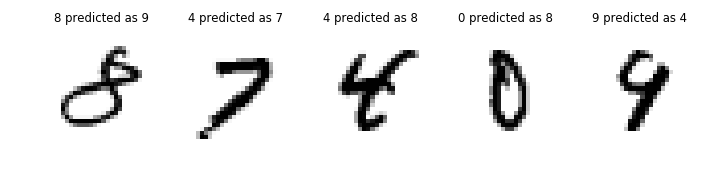



Confusion matrix: 
 [[1289    0    1    1    3    2    9    1    6    0]
 [   0 1579   12    1    2    3    0    3    4    0]
 [   5    4 1297    8    9    2    4    5   11    3]
 [   1    2   16 1360    2   21    0    4   13    8]
 [   1    1    8    2 1305    2    8    5    1   29]
 [   5    1    6   20    4 1206   15    5   13    5]
 [   5    2    3    0    7    7 1369    0    4    0]
 [   2    1   12    3    6    3    0 1412    2   20]
 [   4    9    8   11    7   11    4    4 1324    8]
 [   3    3    4   11   20    8    1   13    7 1349]]

Result: 
              precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      1312
        1.0       0.99      0.98      0.99      1604
        2.0       0.95      0.96      0.96      1348
        3.0       0.96      0.95      0.96      1427
        4.0       0.96      0.96      0.96      1362
        5.0       0.95      0.94      0.95      1280
        6.0       0.97      0.98      0.98      1397
        7.0

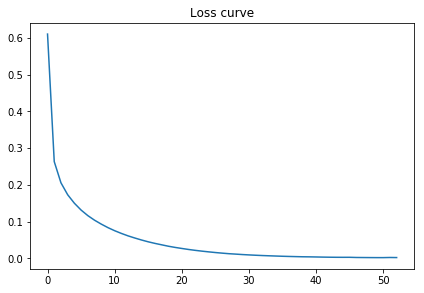

SVM


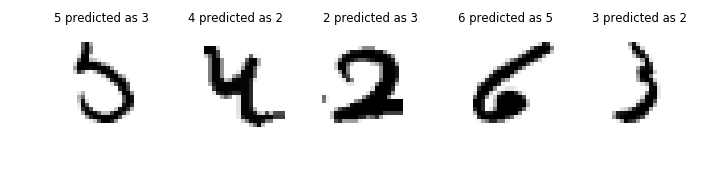


Confusion matrix: 
 [[1300    0    1    0    0    1    6    2    2    0]
 [   0 1587    8    0    1    0    0    7    0    1]
 [   3    3 1310    8    3    0    5    9    5    2]
 [   1    0   11 1381    1    8    0   10   10    5]
 [   2    2    5    1 1320    1    6    9    3   13]
 [   2    0    1   15    2 1229   10    5   13    3]
 [   3    0    2    0    3    7 1373    7    1    1]
 [   2    2    9    3    6    2    0 1427    0   10]
 [   2    5    4    8    2    4    3    1 1358    3]
 [   4    5    4    9   21    6    1   18    4 1347]]

Result: 
              precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1312
        1.0       0.99      0.99      0.99      1604
        2.0       0.97      0.97      0.97      1348
        3.0       0.97      0.97      0.97      1427
        4.0       0.97      0.97      0.97      1362
        5.0       0.98      0.96      0.97      1280
        6.0       0.98      0.98      0.98      1397
        7.0 

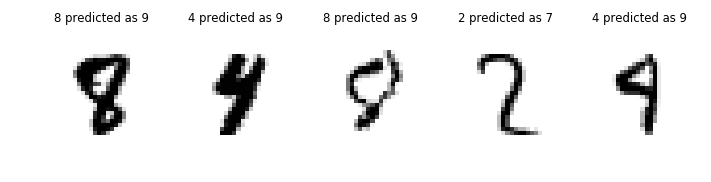


Confusion matrix: 
 [[1304    0    0    0    0    2    3    0    3    0]
 [   0 1583    8    2    2    2    0    4    2    1]
 [   1    2 1311    6    6    0    5    8    8    1]
 [   1    0   14 1373    0   14    0    8   10    7]
 [   2    1    1    0 1319    0    7    4    4   24]
 [   3    0    2   10    0 1238   10    3    9    5]
 [   6    2    0    0    0    6 1381    0    2    0]
 [   1    3   18    1    8    0    0 1413    2   15]
 [   1    6    8   11    4    7    3    2 1332   16]
 [   9    3    4   23   16    4    1   11    3 1345]]

Result: 
              precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1312
        1.0       0.99      0.99      0.99      1604
        2.0       0.96      0.97      0.97      1348
        3.0       0.96      0.96      0.96      1427
        4.0       0.97      0.97      0.97      1362
        5.0       0.97      0.97      0.97      1280
        6.0       0.98      0.99      0.98      1397
        7.0 

In [65]:
class ClfModel:
    def __init__(self, data, labels, miscl, predictions):
        self.data = data
        self.labels = labels
        self.miscl = miscl
        self.predictions = predictions

    def show_miscl_5digits(self):
        # Create a list of tuples, where each tuple represent - (image, image_label, predicted_label)
        miscl_images_and_labels = random.sample(list(zip(self.data[self.miscl], self.labels[self.miscl], self.predictions[self.miscl])), 5)
        # Plot 5 random misclassified digits
        img = plt.figure(1, figsize=(7, 7), dpi=120)
        for index, (image, label, miscl_label) in enumerate(miscl_images_and_labels):
            plt.subplot(1, 5, index + 1)
            plt.axis('off')
            plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.title('%s predicted as %s' % (int(label), int(miscl_label)), fontsize = 7)
        plt.show()

    def miscl_digit_num(self):
        to_list = list(self.miscl)
        return len(to_list[0])

    def print_clf_result(self):
        print
        print('Confusion matrix: \n %s' % confusion_matrix(self.labels, self.predictions))
        print
        print('Result: \n %s' % classification_report(self.labels, self.predictions))
        print

    def get_accuracy(self):
        return accuracy_score(self.labels, self.predictions)

# Getting misclassified results
nn_miscl = np.where(y_test != nn_predictions)
svm_miscl = np.where(y_test != svm_predictions)
rf_miscl = np.where(y_test != rf_predictions)

nn = ClfModel(X_test_v, y_test, nn_miscl, nn_predictions)
svm = ClfModel(X_test_v, y_test, svm_miscl, svm_predictions)
rf = ClfModel(X_test_v, y_test, rf_miscl, rf_predictions)


print ('A NUMBER OF MISCLASSIFIED DIGITS:')
print ('NN - %s' % nn.miscl_digit_num())
print ('SVM - %s' % svm.miscl_digit_num())
print ('RF - %s' % rf.miscl_digit_num())

# NN
print 'NN'
# Plot 5 random misclassified digits
nn.show_miscl_5digits()
print
# Print confusion matrix and classification report
nn.print_clf_result()
# Plot loss curve (NN only)
fig, ax = plt.subplots()
ax.plot(nn_clf.loss_curve_)
plt.tight_layout()
plt.title('Loss curve')
plt.show()

# SVM
print 'SVM'
svm.show_miscl_5digits()
svm.print_clf_result()

# RF
print 'RF'
rf.show_miscl_5digits()
rf.print_clf_result()

print
print ('ACCURACY RESULTS:')
print('NN accuracy: %s' % nn.get_accuracy())
print('SVM accuracy: %s' % svm.get_accuracy())
print('RF accuracy: %s' % rf.get_accuracy())

# Manual Error Analysis 

Look at the misclassfied instances (which digits where not correctly classified)? 
Show these digits / 
show digits and the corresponding wrong clas label!!
This will give some insight

## How can we improve the results? 
- Different network architecture
- Read some papers which done MNIST classificaiton  
- Convolutional Neural Networks (Read about it, implement (Keras))


## Compare Results 